In [1]:
# %%import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse
import os
import seaborn as sns

# %%

In [2]:
csv_num = 41

    soft_reset  PARM_LEARN  time step  ACCUMULATE_EVENT_MILITIME  EVENT_COUNT  \
0         True       False          2                        100        False   
4         True       False          3                        100        False   
8         True       False          4                        100        False   
12        True       False          6                        100        False   
1         True       False          2                        100        False   

    EVENT_TH  TIME_CHANGE  BETA_LEARN  THRESHOLD_LEARN  Leaky  ...  \
0       0.15        False       False            False    0.3  ...   
4       0.15        False       False            False    0.3  ...   
8       0.15        False       False            False    0.3  ...   
12      0.15        False       False            False    0.3  ...   
1       0.15        False       False            False    0.7  ...   

    threshold_3  threshold_4  Energy per inference  Spike Rate  \
0           1.0         10

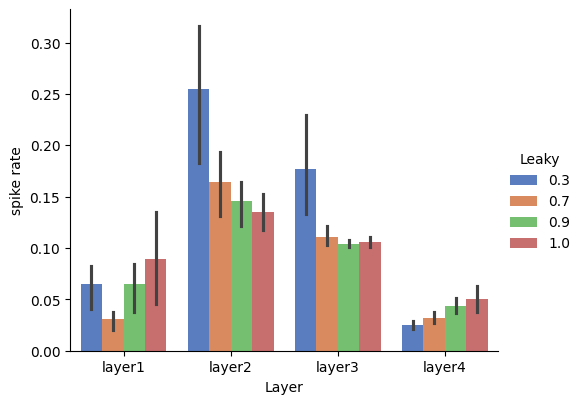

In [3]:
csv_path = f"result_experiment/experiment_{csv_num:03}.csv"
# csv_path = "result_experiment/experiment_031.csv"
data = pd.read_csv(csv_path)
data = data.sort_values(by=["THRESHOLD", "BETA", "FINISH_STEP"])
# finish_step_lst = [2, 4, 6, 8]
leaky_lst = data.loc[:, "BETA"].unique()
timestep_lst = data.loc[:, "FINISH_STEP"].unique()

SAVE_DIR = "result_thesis"
os.makedirs(SAVE_DIR, exist_ok=True)

data = data.rename(columns={"FINISH_STEP": "time step"})
data = data.rename(columns={"BETA": "Leaky"})

# 発火率の関係 when time step = 6
for i in range(4):
    data = data.rename(columns={f"spike_rate_{i}": f"layer{i+1}"})
print(data.head())

data = data[["layer1", "layer2", "layer3", "layer4", "Leaky"]]
print(data.head())
spike_rate_pivot_table = pd.melt(
    data,
    id_vars=["Leaky"],
    value_vars=["layer1", "layer2", "layer3", "layer4"],
    var_name="Layer",
    value_name="spike rate",
)
print(spike_rate_pivot_table)


# plt.figure(figsize=(15, 10))
g = sns.catplot(
    x="Layer",
    y="spike rate",
    hue="Leaky",
    data=spike_rate_pivot_table,
    kind="bar",  # 黒い線は95%信頼区間を示します
    palette="muted",
)
# figsize = (10, 10)
g.fig.set_size_inches(6, 4)
plt.savefig(os.path.join(SAVE_DIR, f"thresh_leaky_spike_rate.png"))
plt.savefig(os.path.join(SAVE_DIR, f"thresh_leakyspike_rate.pdf"))
plt.show()
